In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('unzipped_data/On_Time_On_Time_Performance_2016_8.csv')

/Users/kevin/anaconda/envs/calhacks/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
list(df.columns)

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'UniqueCarrier',
 'AirlineID',
 'Carrier',
 'TailNum',
 'FlightNum',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 

# What questions would you have about this data?

In [8]:
df.shape

(498347, 110)

In [6]:
len(set(df.Origin))

305

In [19]:
df.FlightDate.min()

'2016-08-01'

In [20]:
df.FlightDate.max()

'2016-08-31'

In [21]:
df.DepTime.count()
df.DepTime.dropna().describe()

count    491761.000000
mean       1335.955763
std         508.833662
min           1.000000
25%         916.000000
50%        1329.000000
75%        1748.000000
max        2400.000000
Name: DepTime, dtype: float64

In [11]:
needed_columns = ['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'UniqueCarrier',
 'Origin',
 'OriginCityName',
 'Dest',
 'DestCityName',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrTimeBlk',
 'Cancelled',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'DistanceGroup',
]

In [10]:
# Percentage of flights. 1=Monday, 2=Tuesday, etc.
df[['DayOfWeek', 'DepDel15']].groupby('DayOfWeek').mean()

,DepDel15
DayOfWeek,
1,0.236520
2,0.192396
3,0.179082
4,0.213093
5,0.215063
6,0.206667
7,0.202173


In [195]:
df[['UniqueCarrier', 'DepDelayMinutes']].groupby('UniqueCarrier').count()

,DepDelayMinutes
UniqueCarrier,
AA,78856
AS,16435
B6,24420
DL,82756
EV,41705
F9,8900
HA,7035
NK,11814
OO,54230


In [11]:
# Mean minutes of delay by carrier
df[['UniqueCarrier', 'DepDelayMinutes']].groupby('UniqueCarrier').mean()

,DepDelayMinutes
UniqueCarrier,
AA,17.602427
AS,5.666322
B6,19.117322
DL,18.993922
EV,18.683779
F9,21.333820
HA,3.270505
NK,21.076350
OO,12.512152


In [ ]:
CARRIERS = {
    'AA': 'American',
    'AS': 'Alaska',
    'B6': 'Jet Blue',
    'DL': 'Delta',
    'EV': 'Express Jet',
    'F9': 'Frontier',
    'HA': 'Hawaiian',
    'NK': 'Spirit',
    'OO': 'SkyWest',
    'UA': 'United',
    'VX': 'Virgin',
    'WN': 'Southwest'
}

In [91]:
df[['Origin', 'DepDel15']].groupby('Origin').mean()

,DepDel15
Origin,
ABE,0.239316
ABI,0.222222
ABQ,0.166667
ABR,0.016129
ABY,0.149425
ACK,0.197279
ACT,0.247706
ACV,0.345133
ACY,0.278107


# How would you encode categorical data such a carrier, day of week and origin airport as numerical features?

In [90]:
# Percent of flights arriving within 15 minute of time by origin
mean_dep_delay15 = df[['Origin', 'DepDel15']].groupby('Origin').mean()

In [17]:
len(set(df.Origin))

305

In [23]:
for x in df.Origin:
    break

In [26]:
import numpy as np

* Features:
    * Origin group
    * UniqueCarrier one hot encoding
    * Day of week one hot encoding
    * Time of day bucket
    
* Objective function:
    * DepDelay15 (Whether or not the flight will be delayed by 15 minutes or more

Origin Groups
-------------

In [210]:
match = [x==y for (x,y) in zip((df.DepDelayMinutes >= 15), df.DepDel15)]

In [67]:
quantiles = [0] + list(np.percentile(mean_dep_delay15, [20,40,60,80])) + [1.1]

In [68]:
quantiles

[0,
 0.12664473684210528,
 0.15826476743747647,
 0.18312887862606436,
 0.2180524418922776,
 1.1]

In [93]:
origin_groups = []
for (low, high) in list(zip(quantiles, quantiles[1:])):
    origin_groups.append(
        set(mean_dep_delay15[(mean_dep_delay15 >= low) & (mean_dep_delay15 < high)].dropna().index)
    )

In [94]:
[len(x) for x in origin_groups]

[61, 61, 61, 61, 61]

In [76]:
for i, group in enumerate(origin_groups):
    df['OriginGroup%s' % i] = [int(o in group) for o in df.Origin]

Unique Carrier One-Hot Feature
------------------------

In [87]:
unique_carriers = list(set(df.UniqueCarrier))
for carrier in unique_carriers:
    df['Carrier%s' % carrier]  = [int(x == carrier) for x in df.UniqueCarrier]

Day Of Week One-Hot Feature
------------------------

In [97]:
days_of_week = sorted(list(set(df.DayOfWeek)))
for dow in days_of_week:
    df['DayOfWeek%s' % dow]  = [int(x == dow) for x in df.DayOfWeek]

Time of Day Bucket Feature:
-----------------

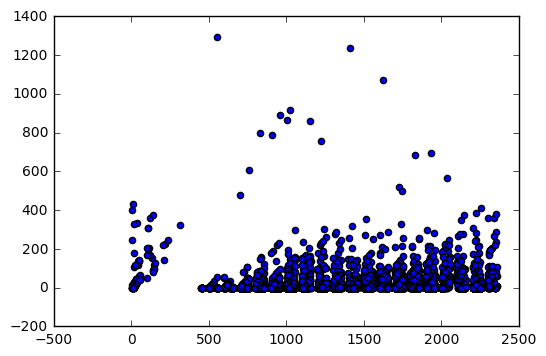

In [297]:
clean_df = df[['DepTime', 'DepDelayMinutes']].dropna()

plt.scatter(x=clean_df.DepTime.iloc[:5000], y = clean_df.DepDelayMinutes.iloc[:5000])

In [99]:
thresholds = [-1, 400, 800, 1200, 1600, 2000, 2401]

In [110]:
buckets = []
for i, (min_time, max_time) in enumerate(list(zip(thresholds, thresholds[1:]))):
    df["DepTimeBucket%s" % i] = ((df.DepTime >= min_time) & (df.DepTime < max_time)).astype(int)

In [122]:
features = (['OriginGroup%s' % i for i in range(5)] +
            ['Carrier%s' % carrier for carrier in unique_carriers] +
            ['DayOfWeek%s' % dow for dow in days_of_week] + 
            ['DepTimeBucket%s' % i for i in range(6)]
           )

In [214]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [252]:
model = LogisticRegression()

In [253]:
clean_df = df[features + ['DepDelayMinutes']].dropna()

In [264]:
clean_df['Delayed'] = [int(x >= 15) for x in clean_df.DepDelayMinutes]

In [265]:
train_size = int(len(clean_df) * 0.7)

In [266]:
model.fit(clean_df[features].iloc[:train_size], clean_df.Delayed.iloc[:train_size])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [267]:
predictions = model.predict(clean_df[features].iloc[train_size:])

In [268]:
actuals = clean_df.Delayed.iloc[train_size:]

In [299]:
origin_groups

[{'ABR',
  'ADQ',
  'AMA',
  'ANC',
  'ATW',
  'AZO',
  'BET',
  'BFL',
  'BIL',
  'BIS',
  'BRW',
  'BTM',
  'BZN',
  'CDC',
  'CIU',
  'CPR',
  'DLG',
  'DVL',
  'EFD',
  'EKO',
  'EWN',
  'FCA',
  'FNT',
  'FSD',
  'GCC',
  'GEG',
  'GFK',
  'GJT',
  'GTF',
  'HDN',
  'HLN',
  'HNL',
  'HRL',
  'HYS',
  'IDA',
  'INL',
  'ISN',
  'ITH',
  'ITO',
  'JMS',
  'JNU',
  'KOA',
  'KTN',
  'LCH',
  'LIH',
  'LSE',
  'LWS',
  'MOT',
  'MQT',
  'MSO',
  'OGG',
  'PIH',
  'PLN',
  'PPG',
  'RKS',
  'SCC',
  'SGU',
  'SIT',
  'TWF',
  'WYS',
  'YUM'},
 {'ABY',
  'ASE',
  'BDL',
  'BGM',
  'BMI',
  'BOI',
  'BQK',
  'BRD',
  'BRO',
  'BUF',
  'CHA',
  'COD',
  'CRP',
  'CWA',
  'DAY',
  'DSM',
  'ECP',
  'EGE',
  'ERI',
  'EUG',
  'EYW',
  'FAR',
  'FWA',
  'GNV',
  'GRB',
  'GRK',
  'GRR',
  'GST',
  'GUC',
  'ILM',
  'JAC',
  'LAN',
  'LAR',
  'LBB',
  'LNK',
  'MAF',
  'MCI',
  'MHT',
  'MKE',
  'MLB',
  'MRY',
  'MTJ',
  'OKC',
  'OMA',
  'OTZ',
  'PDX',
  'PHF',
  'PIT',
  'PSC',
  'PSE',


In [275]:
from sklearn.metrics import roc_curve, auc

In [276]:
predict_probs = [tpl[1] for tpl in model.predict_proba(clean_df[features].iloc[train_size:])]

In [277]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(actuals, predict_probs)


In [278]:
import matplotlib.pyplot as plt

/Users/kevin/anaconda/envs/calhacks/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


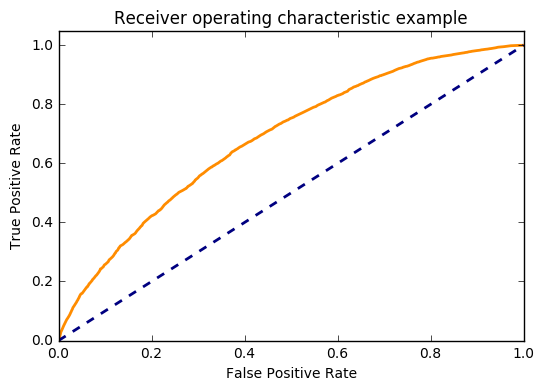

In [279]:
#Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [280]:
auc(fpr, tpr)

0.68482183879917058

In [281]:
model.intercept_

array([-0.88227567])

In [282]:
coefs = dict(list(zip(features, model.coef_[0])))

In [283]:
coefs

{'CarrierAA': -0.0019204985425103213,
 'CarrierAS': -0.84841944514035605,
 'CarrierB6': 0.12241821143901417,
 'CarrierDL': -0.13261989508615579,
 'CarrierEV': -0.010973177444743456,
 'CarrierF9': 0.0,
 'CarrierHA': 0.0,
 'CarrierNK': 0.0,
 'CarrierOO': -0.023123225427465505,
 'CarrierUA': 0.16964701242785432,
 'CarrierVX': -0.053647076481738616,
 'CarrierWN': -0.10363757129666461,
 'DayOfWeek1': 0.063727159827779406,
 'DayOfWeek2': -0.1853191855446592,
 'DayOfWeek3': -0.30014428231028273,
 'DayOfWeek4': -0.094916176670324648,
 'DayOfWeek5': -0.062572400878981818,
 'DayOfWeek6': -0.084710367475524101,
 'DayOfWeek7': -0.21834041248771782,
 'DepTimeBucket0': 1.3627774299145421,
 'DepTimeBucket1': -1.9928496577654837,
 'DepTimeBucket2': -0.82127521506520362,
 'DepTimeBucket3': -0.27652436329447116,
 'DepTimeBucket4': 0.17856868964922734,
 'DepTimeBucket5': 0.66702745101136107,
 'OriginGroup0': -0.67761214167229855,
 'OriginGroup1': -0.25382448266698804,
 'OriginGroup2': -0.1104108423712142